# k-최근접 이웃 분류기로 확률 계산하기

이웃 클래스의 비율을 확률이라고 출력.

In [ ]:
# 로지스틱 회귀 : 곡선을 이진 분류

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))                                                   #pd.을 붙여주면 리스트로 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish['Species'].unique()                                                            # 그냥 출력하면 array

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()    # numpy의 형태로 바뀌 훈련을 할 수 있는 상태로 만든다.

print(fish_input[:5]); print()
print(fish_input.shape)                                                              # fish_input은 (159, 5)로 159행 5열이다.

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]

(159, 5)


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)
print()

print(train_input[:5]); print()
print(train_target[:5]); print()
print(test_input[:5]); print()                                                      # numpy이기 때문에 head가 아닌 슬라이스로 짤라낸다.
print(test_target[:5])

(119, 5) (119,) (40, 5) (40,)

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']

[[ 78.      18.7     19.4      5.1992   3.1234]
 [ 13.4     12.4     13.5      2.43     1.269 ]
 [200.      32.3     34.8      5.568    3.3756]
 [270.      26.      28.7      8.3804   4.2476]
 [150.      23.      24.5      5.2185   3.626 ]]

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [ ]:
from sklearn.preprocessing import StandardScaler                                    # 데이터(계수)의 정규화.

ss = StandardScaler()
ss.fit(train_input)                                                                 # 정규화(StandardScaler)를 객체화 시켰다면 fit를 사용해 train_input을 훈련시킨다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)                                              # transform으로 정규화 시킨 데이터로 변경할 때는 test(test는 따로 훈련을 시키지 않는다.)도 같이 한다.

print(train_scaled[:5]); print()
print(test_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


## 다중 분류(multiclass classification)

타깃 데이터에 **2개 이상의 클래스**가 포함된 문제. 이진 분류에서는 타깃 데이터에 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 데이터를 만들었음. 다중 분류에서도 타깃값을 숫자로 바꿀 수 있지만, 문자열로 된 타깃값을 그대로 사용할 수 있다.

**주의 : 타깃값을 그대로 사이킷런 모델에 전달하면서 순서가 자동으로 알파벳 순으로 정렬된다.**

위 자료에서는 타깃값이 fish['Species']로 총 7종류의 물고기 클래스가 들어가 있다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier                                  # k-최근접 이웃 알고리즘 사요하기

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)                                                                  # 타깃값은 classes_ 에 저장된다.
                                                                                    # 주의 : 클래스의 순서가 알파벳 순으로 정렬되었다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


## 확률 계산(predict_proba)

사이킷런의 분류 모델은 predict_proba() 메서드로 클래스별 확률값을 반환한다.

In [ ]:
import numpy as np                                                                  # round를 사용하기 위해 numpy를 import한다.

proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_); print()
print(np.round(proba, 4))                                                           # 주의 : KNeighborsClassifier으로 인해 클래스의 순서가 정렬되었으므로 나온 정보도 정렬된 순서이다.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])                                # 지정한 데이터와 가장 가까운 데이터를 확인
print(train_target[indexes])                                                        # 5번째 클래스가 하나, 3번째 클래스가 2개 나왔으므로 각각 0.666, 0.333 의 확률을 가진다.

[['Roach' 'Perch' 'Perch']]


_____

# 로지스틱 회귀(logistic regression)

회귀가 아닌 분류 모델. 선형 방정식을 학습.




$ z = as + by + cg + dh + ew + f$ : 로지스틱 회귀가 학습하는 방법(선형 방정식)


$PI = 1 / (1 + e^-z)$ : **시그모이드 함수(sigmoid function)** 또는 **로지스틱 함수(logistic function)**

 (e의 -z승을 표한한 것이다.)

## 시그모이드 함수(sigmoid function) 

언제나 0과 1 사이메만 존재한다.

z가 아주 큰 음수일 때는 0이 되고, z가 아주 큰 양수일 때는 1이 된다.

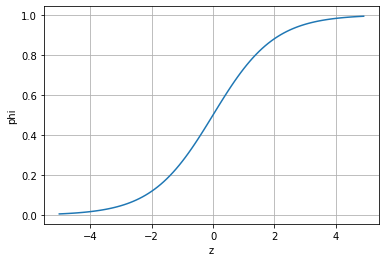

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

z = np.arange(-5, 5, 0.1)

phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.grid()
plt.xlabel('z')                                                                     # 파이(pi)를 그래프로 그린 것이다. 다시 말해, 이 그래프를 그리기 위해서는 z 값을 구해서 대입해야한다는 뜻이 된다.
plt.ylabel('phi')
plt.show()                                                                          # 그래프는 0과 1 사이에서마 존재한다. 또한 x축이 0이 되는 부분은 0.5의 값을 가진다.
                                                                                    # 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단.(사이킷런에서 0.5 일 때는 음성 클래스로 판단.)

## 불리언 인덱싱(boolean indexing)

이진 분류를 사용하는 과정이다.

True로 특성한 원소를 선택하여 사용하는 방식이다.

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])

print(char_arr[[True, False, True, False, False]])                                   # True로 지정된 값만 출력한다.

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')         # 조건에 맞는 데이터를 True 혹은 False로 반환한다.
train_bream_smelt = train_scaled[bream_smelt_indexes]                               # train_scaled에서 True 조건인 Bream과 Smelt만 가져온다.
target_bream_smelt = train_target[bream_smelt_indexes]                              # train_target에서 True 조건인 Bream과 Smelt만 가져온다.

In [ ]:
print(bream_smelt_indexes)

[ True False  True False False False False  True False False False  True
 False False False  True  True False False  True False  True False False
 False  True False False  True False False False False  True False False
  True  True False False False False False  True False False False False
 False  True False  True False False  True False False False  True False
 False False False False False  True False  True False False False False
 False False False False False  True False  True False False  True  True
 False False False  True False False False False False  True False False
 False  True False  True False False  True  True False False False False
 False False False False  True  True False False  True False False]


## LogisticRegression으로 로지스틱 회귀 모델 훈련

LogisticRegression은 선형 모델로 sklearn.linear_model 패키지 아래에 존재한다.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


### 확률 계산(predict_proba)

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))                                      # 확률을 계산하기 위해서 predict_proba() 메소드를 사용한다.
                                                                                    # 순서 중요. 확인하기 위해서는 'lr.classes_'

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)                                                                  # 1에 가까울수록 Bream(도미)이다.

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)                                                      # 계수와 절편 확인하기(학습 변수)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


### z 값 출력(decision_function)

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])                             # decision_function()은 z 값을 출력하기 위한 메소드이다.
print(decisions)                                                                    # 도미와 빙어의 z 값을 출력한다.(이중 분류이기 때문에 하나의 z 값이 나온다.)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


### z 값을 이용하여 확률 계산하기(expit)

In [ ]:
from scipy.special import expit                                                     # expit을 이용하면 직접 분수 계산을 하지 않고도 확률을 계산할 수 있다.

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


____________

# 로지스틱 회귀로 다중 분류 수행하기(LogisticRegression)

위의 내용이 이중 분류였다면 이번에는 로지스틱 회귀를 사용하여 다중 분류를 한다. 물론, 이중 분류와 똑같이 LogisticRegression를 사용한다.

LogisticRegression는 기본적으로 반복적인 알고리즘을 사용한다.

- 매개변수 **max_iter** : 반복 횟수를 지정. 디폴트 값은 100

- 규제 매개변수 **C** : 기본값은 1, 릿지 회귀(Ridge)와 같이 제곱을 규제하지만 릿지의 alpha와 반대로 **작을수록 규제가 커진다.**

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
print(kn.classes_); print()

proba = lr.predict_proba(test_scaled[:5])                                          # 확률 계산에는 predict_proba를 사용한다.
print(np.round(proba, 3))                                                          # 결과값은 softmax와 같다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.coef_, lr.intercept_); print()
print(lr.coef_.shape, lr.intercept_.shape)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]] [-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])                                   # 이진 분류에서처럼 z 값을 구하기위해 decision_function을 사용한다.
print(np.round(decision, 2))                                                       # z 값을 구함, (다중 분류이기 때문에 클래스마다 하나의 z 값을 구하게 된다.)

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


## 소프트맥스(softmax)

여러 개의 z 값이 주어질 경우 predict_proba가 아닌 softmax를 활용한다.

softmax는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 **전체 합이 1**이 되도록 만든다. 이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부른다.

여러 개의 z 값을 사용해 $e^z$ 를 생성된 z의 수만큼 만들어 모두 더하고, 더한 값을 각각의 $e^z$ 로 나누다. 

In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, 3))                                                          # 결과값은 predict_proba와 같다.

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
